In [1]:
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import numpy as np
from scipy.stats import norm

%matplotlib inline
%config InlineBackend.figure_format = "retina"

sns.set(rc={"figure.figsize" : (25, 15)})
sns.set(font_scale=2)
sns.set_style("ticks")

warnings.simplefilter("ignore", FutureWarning)  # ignore some seaborn warnings until they update numpy

In [2]:
df = pandas.read_csv("NHL_API_point_totals_by_team_season_raw_1996-2003.csv")
sea_df = df[df["team"] == "SEA"].copy()
sea_df

,team,season_end,total_points,points_rank
798,SEA,2022,60,30
830,SEA,2023,100,12


In [14]:
dist_mean = df["total_points"].mean()
dist_std = df["total_points"].std()
(dist_mean, dist_std)

(86.27557160048134, 17.34413876565443)

In [15]:
dist = norm(loc=dist_mean, scale=dist_std)
total_points = list(range(df["total_points"].min() - 1,
                          df["total_points"].max() + 1))
pmf = pandas.Series(dist.pdf(total_points), index=total_points)
pmf /= sum(pmf)

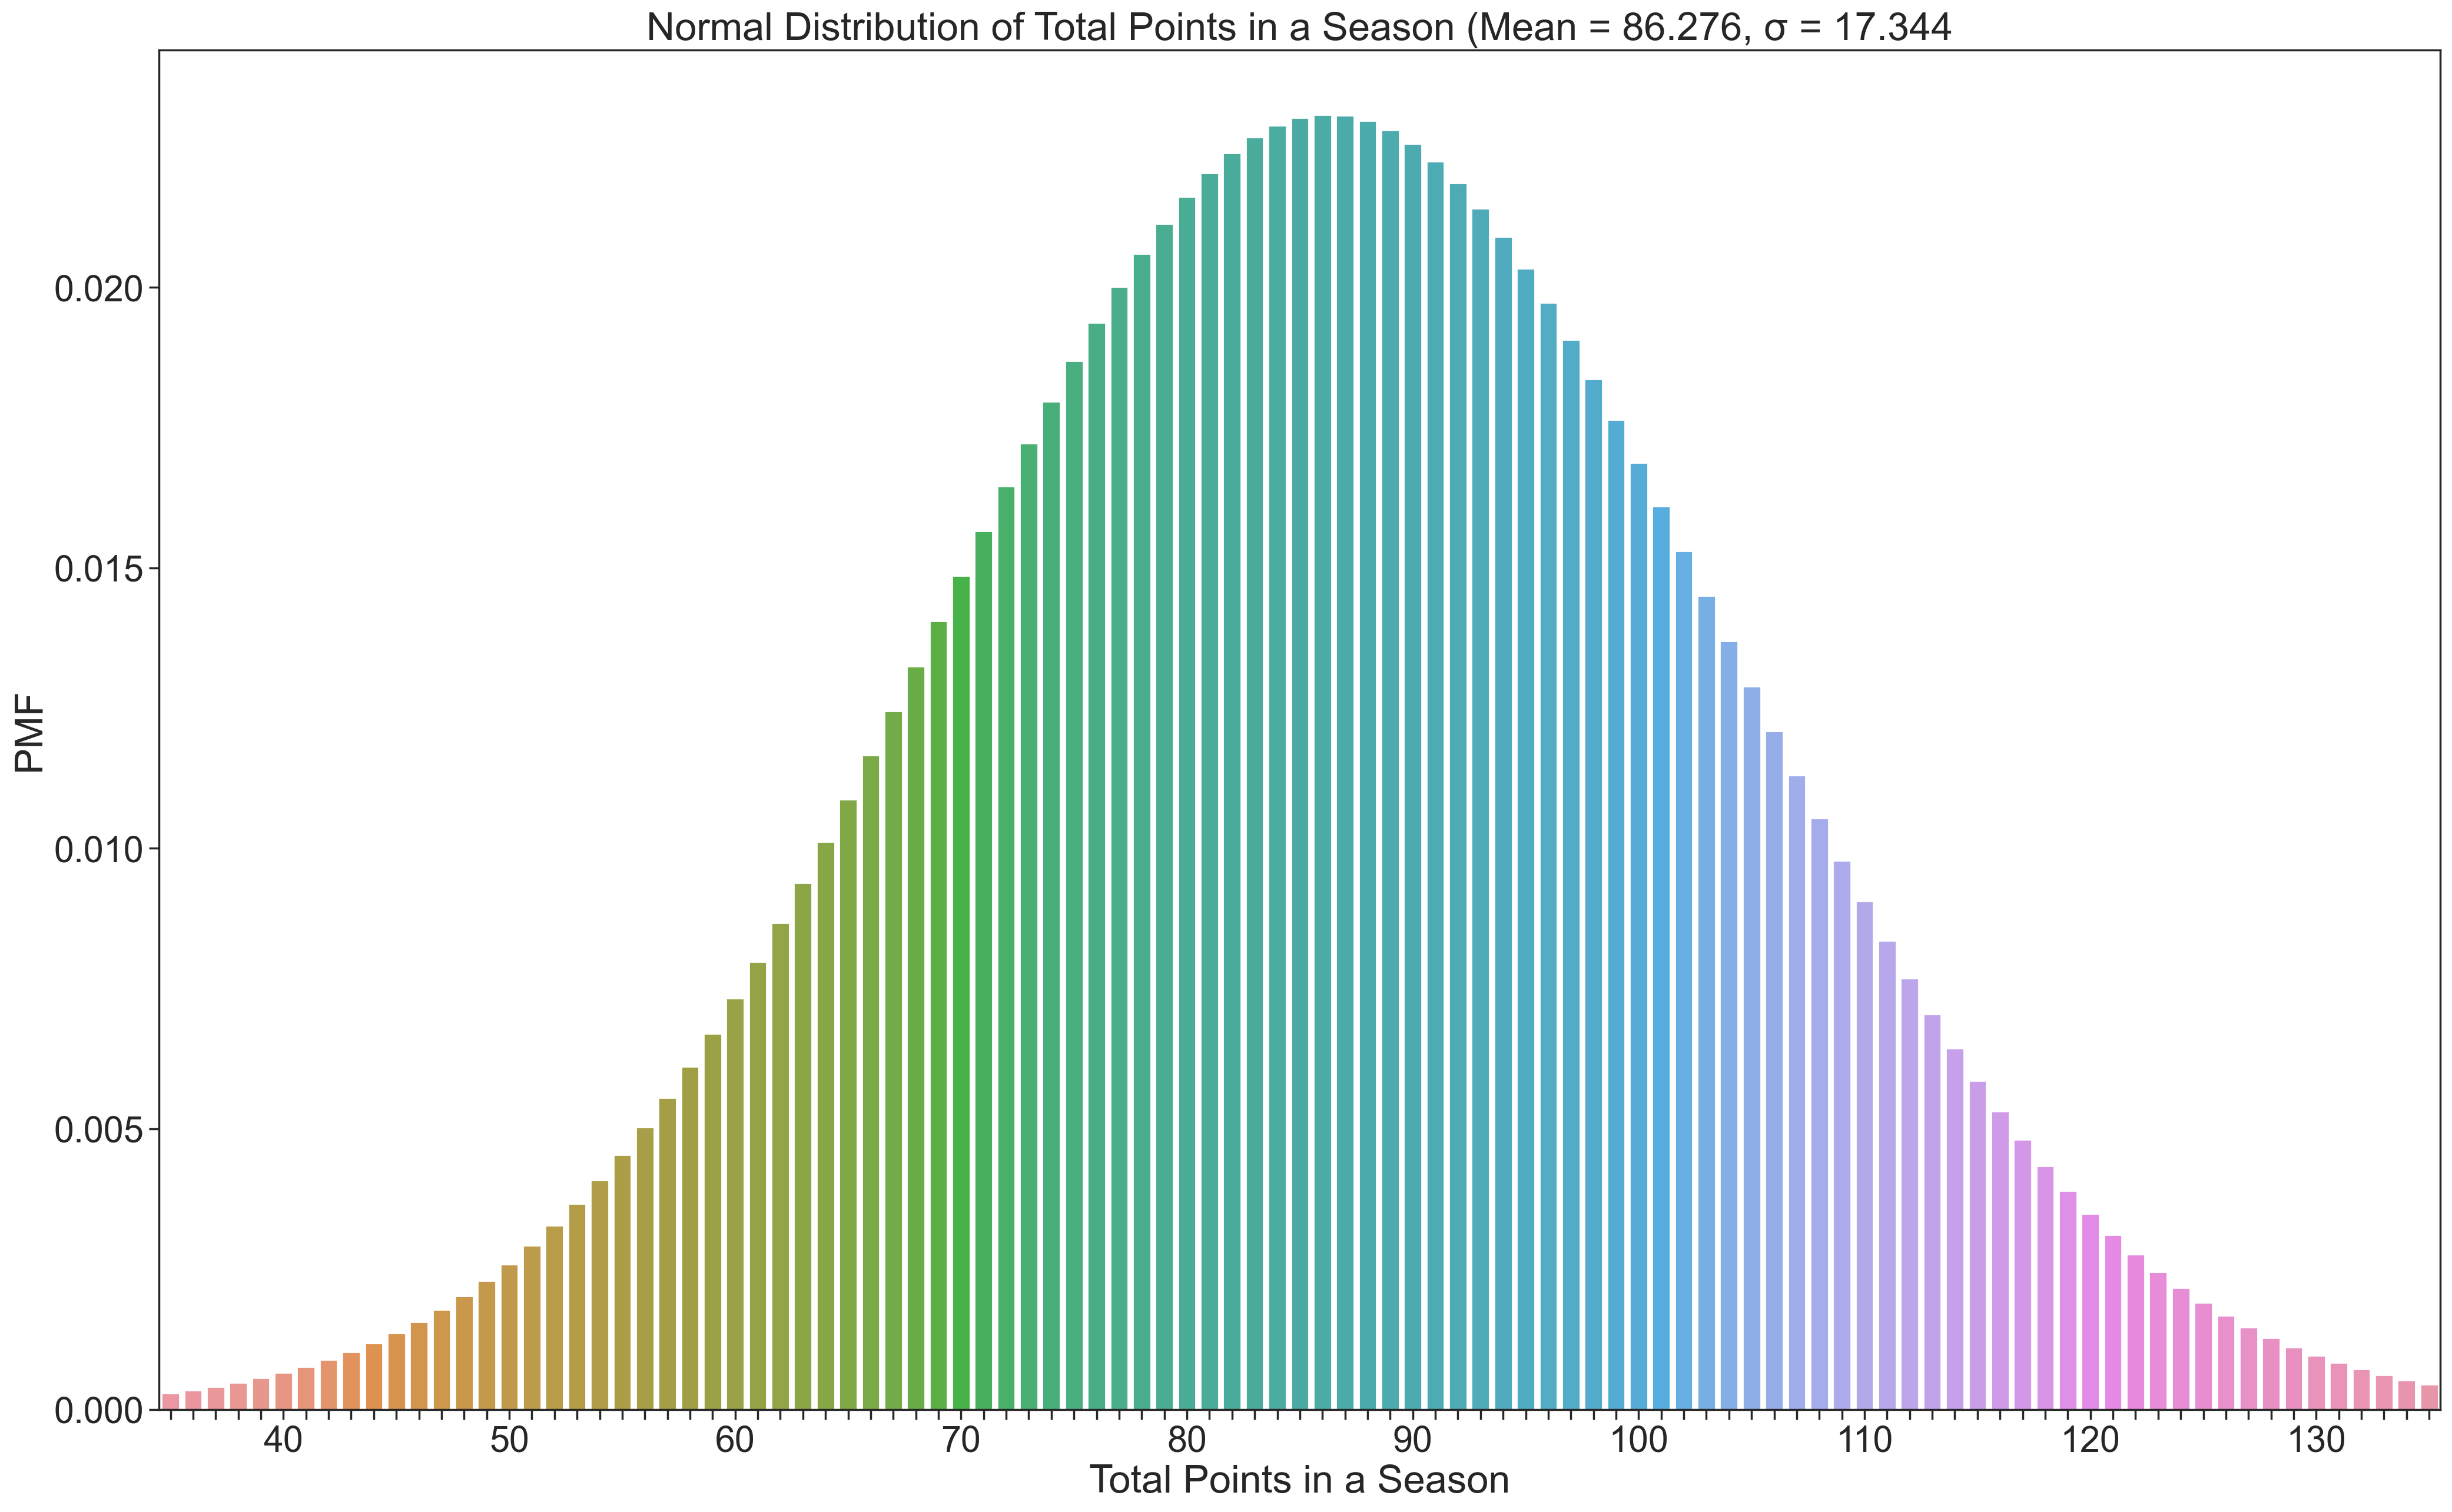

In [17]:
ax = sns.barplot(x=total_points, y=pmf)
for label in ax.get_xticklabels():
    if np.int64(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set_xlabel("Total Points in a Season")
ax.set_ylabel("PMF")
ax.set_title("Normal Distribution of Total Points in a Season (Mean = {}, σ = {}".format(
    np.around(dist_mean, 3), np.around(dist_std, 3)))
plt.show()

In [18]:
pmf[sea_df["total_points"]]

60     0.007328
100    0.016881
dtype: float64

In [19]:
pmf.sum()

1.0

---

Let:

* $k$ = the total number of points we expect SEA to obtain in the 2023-2024 season;
* $a$ = the total number of points SEA obtained in the 2021-2022 season (60);
* $b$ = the total number of points SEA obtained in the 2022-2203 season (100);

Then, what we're interested in knowing is the value of $k$ that gives us the largest value of $P(k|a,b)$, [which is](https://math.stackexchange.com/questions/2463896/bayes-rule-for-two-conditioned-events):

$$ P(k|a,b) = \frac{P(k,a|b) P(b)}{P(a|b) P(b)} $$

In [20]:
p_a = pmf[sea_df["total_points"].iloc[0]]
p_b = pmf[sea_df["total_points"].iloc[1]]
p_a_given_b = (p_a * p_b) / p_b  # since a happened first, it's an independent event, but b is dependent on a having happened
p_k_given_a_b = []

for k in total_points:
    p_k = pmf[k]
    p_k_and_a_and_b = p_a * p_k * p_b
    p = (p_k_and_a_and_b * p_b) / (p_a_given_b * p_b)
    p_k_given_a_b.append(p)

In [21]:
predicted_pmf = pandas.Series(p_k_given_a_b, index=total_points)
predicted_pmf /= predicted_pmf.sum()

<Axes: >

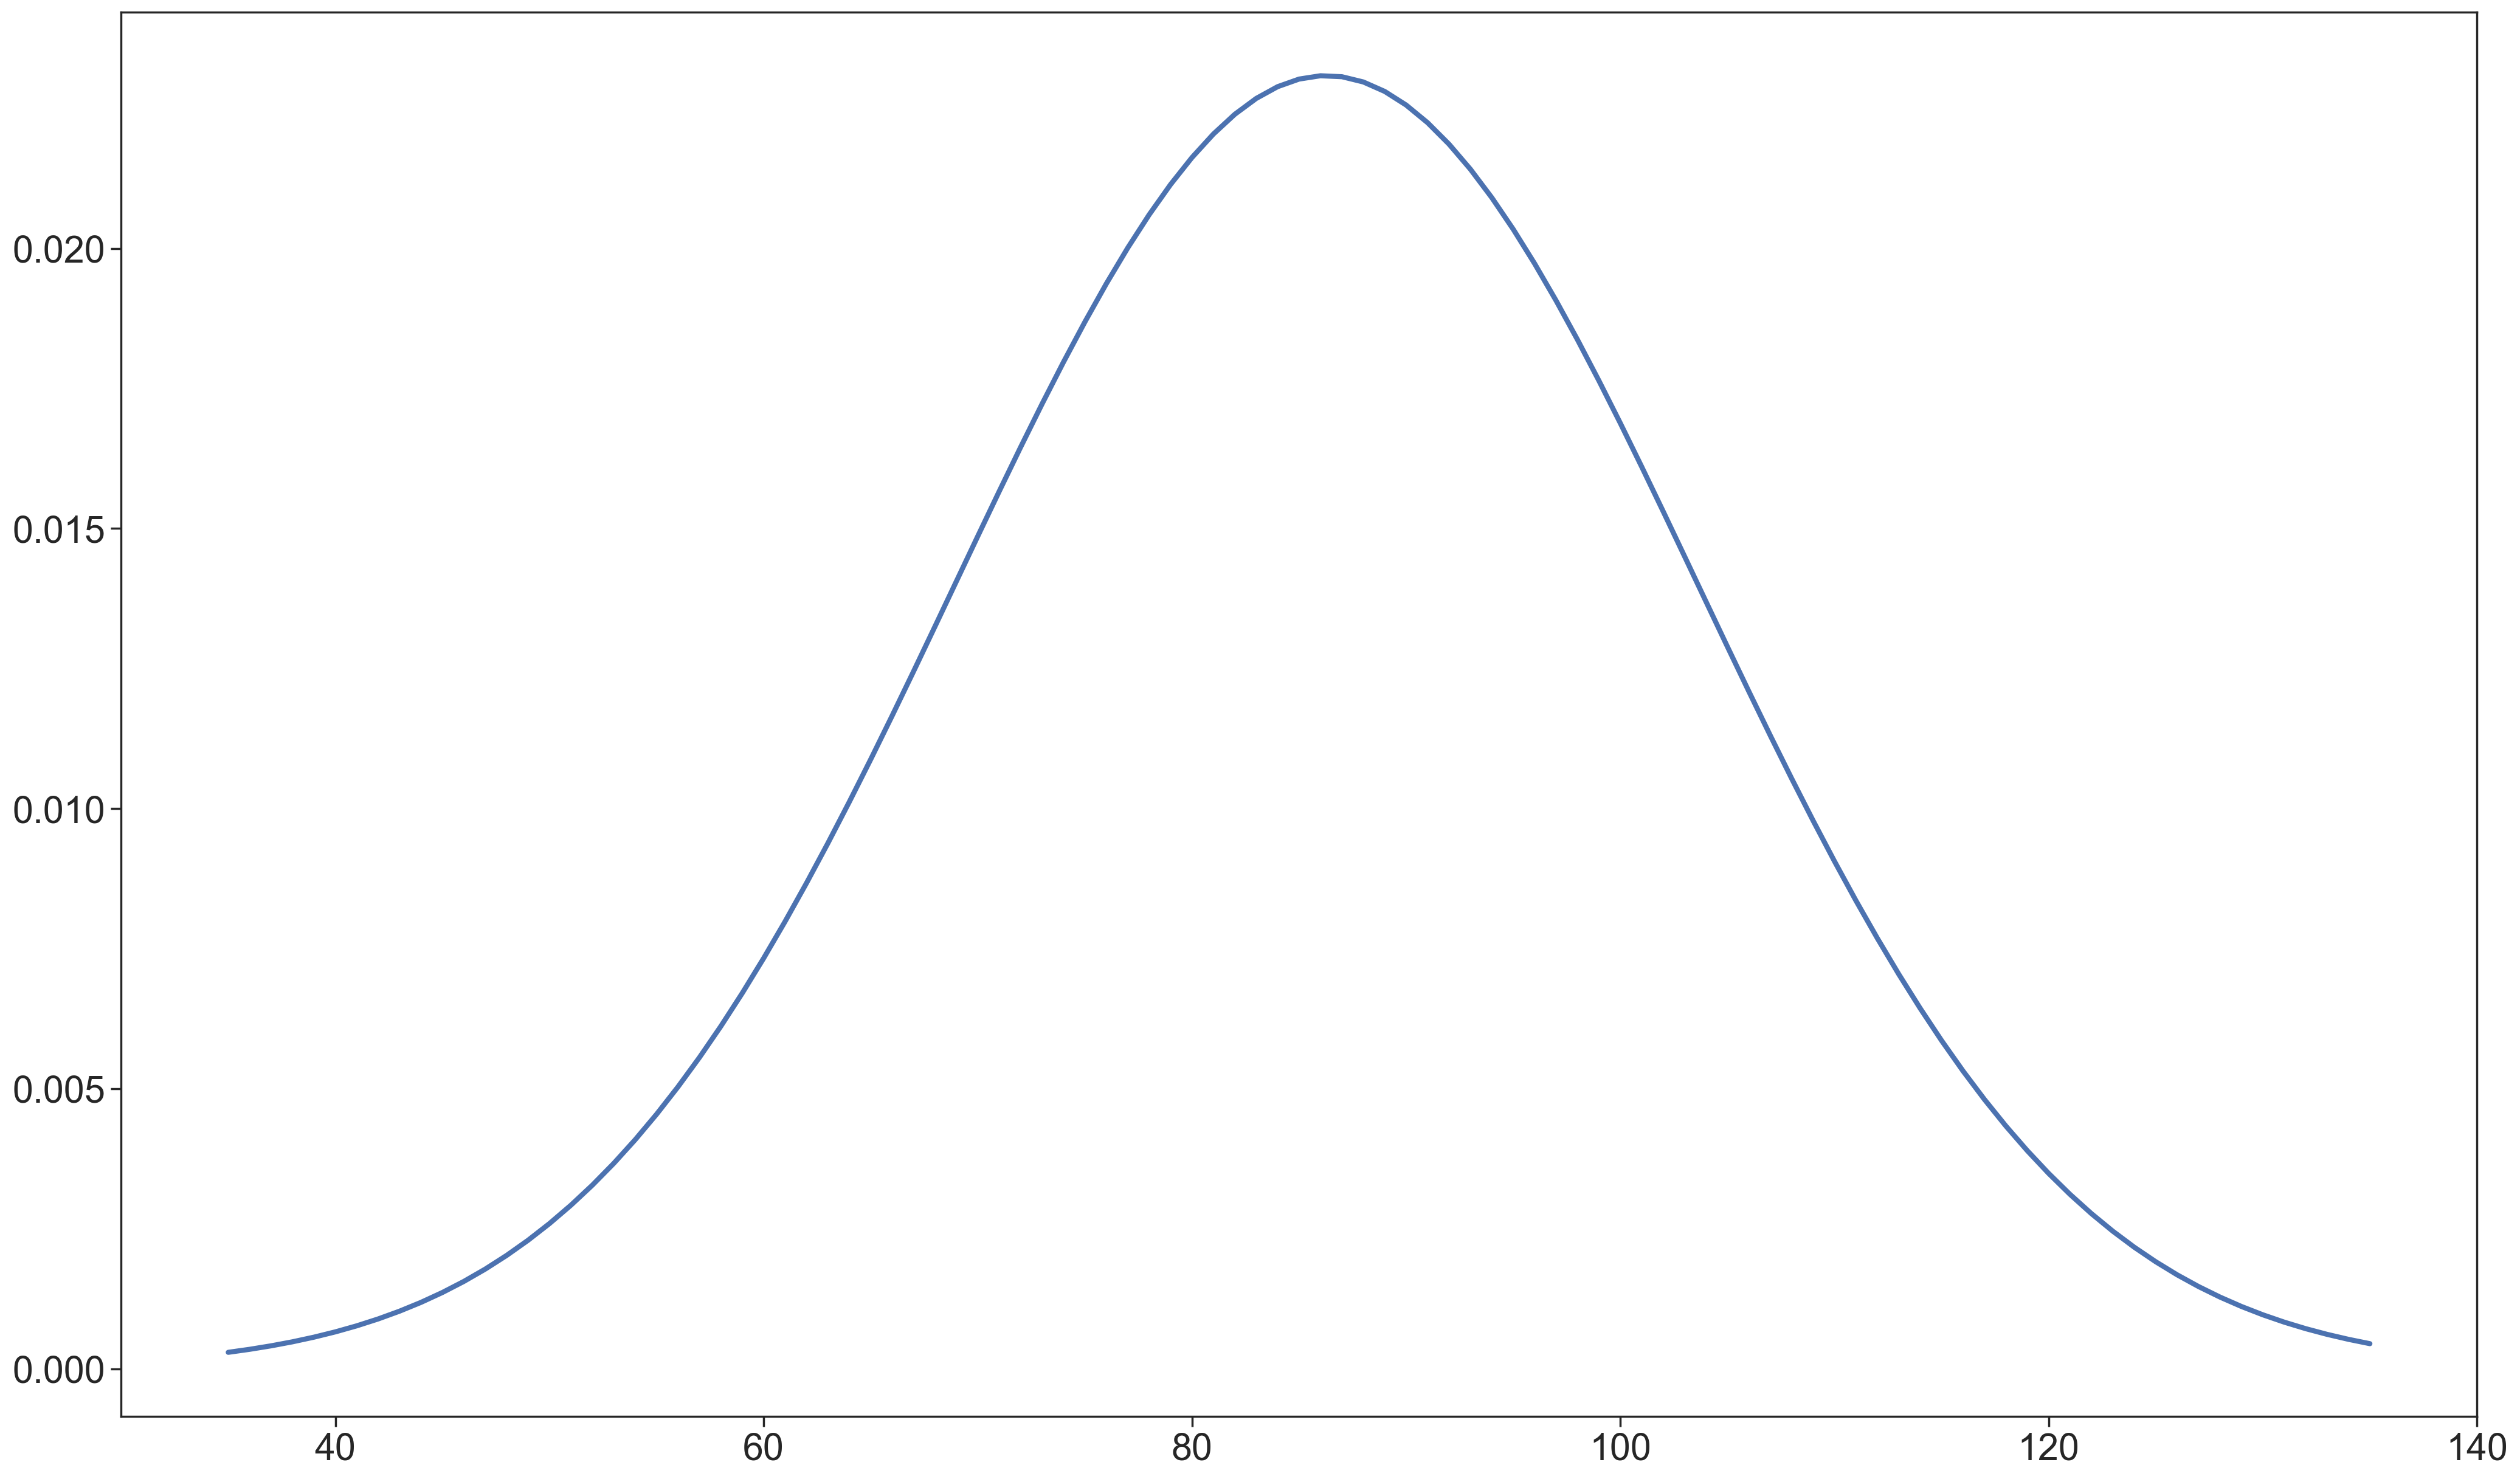

In [22]:
sns.lineplot(x=predicted_pmf.index, y=predicted_pmf, linewidth=3)

In [23]:
predicted_pmf.idxmax()

86